In [3]:
import pandas as pd
import numpy as np


In [4]:
#import train/test datasets
train = pd.read_csv("data/full_train.csv")
test = pd.read_csv("data/full_test.csv")
test

,Unnamed: 0,CaseReferenceNumber,MotionID,CaseLocation,CaseMajorCode,CaseMinorCode,CaseTrialListType,CaseMarkingCode,CaseDispositionJudgeJurisNo,CaseDispositionDocketLegendCode,...,MotionJurisNumber,MotionDocumentPriorityCode,CaseAttorneyJuris,CaseAttorneyType,MotionTimeDuration,MotionDocumentTypeName,SelfRepBeforeMotionFileCount,SelfRepBeforeMotionDecidedCount,SelfRepBeforeMotionFileBool,SelfRepBeforeMotionDecidedBool
0,1578,155493,1067468,MMX,T,50,9,14.0,411098.0,WDACT,...,80739.0,30,80739.0,R,145.0,MOTION TO STRIKE,0,0,False,False
1,21947,3663396,20114924,HHD,V,1,9,1.0,NaN,WDACT,...,434440.0,30,434440.0,J,84.0,MOTION TO STRIKE,0,0,False,False
2,20480,3602075,18417483,FST,V,1,9,3.0,NaN,WDACT,...,433233.0,30,433233.0,J,90.0,MOTION TO STRIKE,0,0,False,False
3,23344,3820814,22114636,KNL,V,1,9,13.0,NaN,NaN,...,435697.0,30,435697.0,R,240.0,MOTION TO STRIKE,0,0,False,False
4,23800,3852633,22706686,NNH,V,9,9,14.0,NaN,WDACT,...,435699.0,30,435699.0,J,46.0,MOTION TO STRIKE,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,4623,505725,3703075,FST,T,90,9,16.0,NaN,WDACT,...,408514.0,30,408514.0,R,161.0,MOTION TO STRIKE,0,0,False,False
1693,7476,723579,5564904,HHB,V,1,9,16.0,NaN,WDACT,...,414022.0,30,414022.0,R,112.0,MOTION TO STRIKE,0,0,False,False
1694,1930,211203,1391984,HHD,T,90,1,NaN,NaN,WDACT,...,81181.0,30,81181.0,R,21.0,MOTION TO STRIKE,0,0,False,False
1695,11814,2880531,9060702,NNH,T,90,9,15.0,415132.0,JODD,...,408383.0,30,408383.0,J,110.0,MOTION TO STRIKE,0,0,False,False


In [5]:
dataset = pd.read_csv("data/motionStrike_ALLcodes_data.tsv", delimiter = '\t')
dataset

,CaseReferenceNumber,MotionID,CaseLocation,CaseMajorCode,CaseMinorCode,CaseTrialListType,CaseMarkingCode,CaseDispositionJudgeJurisNo,CaseDispositionDocketLegendCode,MotionResultCode,...,MotionJurisNumber,MotionDocumentPriorityCode,CaseAttorneyJuris,CaseAttorneyType,MotionTimeDuration,MotionDocumentTypeName,SelfRepBeforeMotionFileCount,SelfRepBeforeMotionDecidedCount,SelfRepBeforeMotionFileBool,SelfRepBeforeMotionDecidedBool
0,207,1751,FBT,V,1,9,16.0,416586.0,JDGDACT,GR,...,418027.0,30,418027.0,J,78.0,MOTION TO STRIKE,1,1,True,True
1,1472,10915,FBT,V,1,9,16.0,NaN,WDACT,DN,...,416586.0,30,416586.0,R,22.0,MOTION TO STRIKE,0,0,False,False
2,1494,11050,NNI,V,1,9,16.0,NaN,WDACT,GR,...,422392.0,30,422392.0,J,285.0,MOTION TO STRIKE,0,0,False,False
3,497,3561,FST,M,50,-1,NaN,89997.0,JOD,GR,...,420175.0,30,420175.0,R,742.0,MOTION TO STRIKE,0,0,False,False
4,1629,12082,NNH,P,0,3,18.0,80278.0,SUPJ,OR,...,421278.0,30,421278.0,J,95.0,MOTION TO STRIKE,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25922,4141135,26657534,BPH,H,0,-1,NaN,NaN,NaN,OF,...,438579.0,30,438579.0,J,9.0,MOTION TO STRIKE,0,0,False,False
25923,4163797,26710390,NBH,H,0,-1,NaN,414022.0,JPFSBS,WD,...,407850.0,30,407850.0,X,15.0,MOTION TO STRIKE,1,2,True,True
25924,3648565,26712817,HHD,P,90,3,NaN,NaN,NaN,OR,...,434447.0,30,434447.0,J,5.0,MOTION TO STRIKE,0,0,False,False
25925,4161949,26728400,NHH,H,20,-1,NaN,NaN,NaN,GR,...,438571.0,30,438571.0,J,3.0,MOTION TO STRIKE,1,1,True,True


In [6]:
#important columns identifiers 
target= dataset["MotionResultCode"]
#apply to train/test as welll
target_test = test["MotionResultCode"]
target_train = train["MotionResultCode"]
#potential features
features = dataset[["CaseMajorCode", "MotionTimeDuration", "CaseLocation", "CaseAttorneyJuris"]]
#train/test
features_train = train[["CaseMajorCode", "MotionTimeDuration", "CaseLocation", "CaseAttorneyJuris"]]
features_test = test[["CaseMajorCode", "MotionTimeDuration", "CaseLocation", "CaseAttorneyJuris"]]


0       DN
1       GR
2       GR
3       DN
4       DN
        ..
7348    GR
7349    DN
7350    DN
7351    DN
7352    GR
Name: MotionResultCode, Length: 7353, dtype: object

In [7]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [8]:

#tabTransformer encoder use that - they did the exact same thing it is pointless
toEncode = ['CaseMajorCode', 'CaseLocation', 'CaseAttorneyJuris']
for i in toEncode:
    le = LabelEncoder()
    features[i] = le.fit_transform(features[i])
    features_train[i] = le.fit_transform(features_train[i])
    features_test[i] = le.fit_transform(features_test[i])
features_test

/tmp/ipykernel_736/4070133082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = le.fit_transform(features[i])
/tmp/ipykernel_736/4070133082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[i] = le.fit_transform(features_train[i])
/tmp/ipykernel_736/4070133082.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,CaseMajorCode,MotionTimeDuration,CaseLocation,CaseAttorneyJuris
0,6,145.0,10,33
1,7,84.0,6,223
2,7,90.0,3,221
3,7,240.0,7,231
4,7,46.0,13,232
...,...,...,...,...
1692,6,161.0,3,91
1693,7,112.0,5,114
1694,6,21.0,6,48
1695,6,110.0,13,90


In [9]:
#filter out nans

features = features.dropna()
features_train = features_train.dropna()
features_test = features_test.dropna()


features_test

,CaseMajorCode,MotionTimeDuration,CaseLocation,CaseAttorneyJuris
0,6,145.0,10,33
1,7,84.0,6,223
2,7,90.0,3,221
3,7,240.0,7,231
4,7,46.0,13,232
...,...,...,...,...
1692,6,161.0,3,91
1693,7,112.0,5,114
1694,6,21.0,6,48
1695,6,110.0,13,90


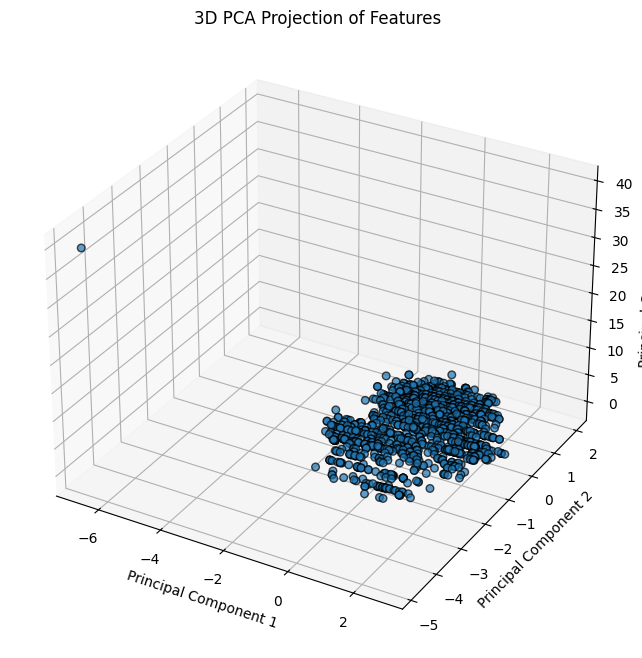

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


scaler = StandardScaler()
feature_scaled_test = scaler.fit_transform(features_test)
feature_scaled_train = scaler.fit_transform(features_train)

pca = PCA(n_components=3)
feature_pca = pca.fit_transform(feature_scaled_test)


x = feature_pca[:, 0]
y = feature_pca[:, 1]
z = feature_pca[:, 2]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=30, edgecolor='k', alpha=0.7)

ax.set_title('3D PCA Projection of Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

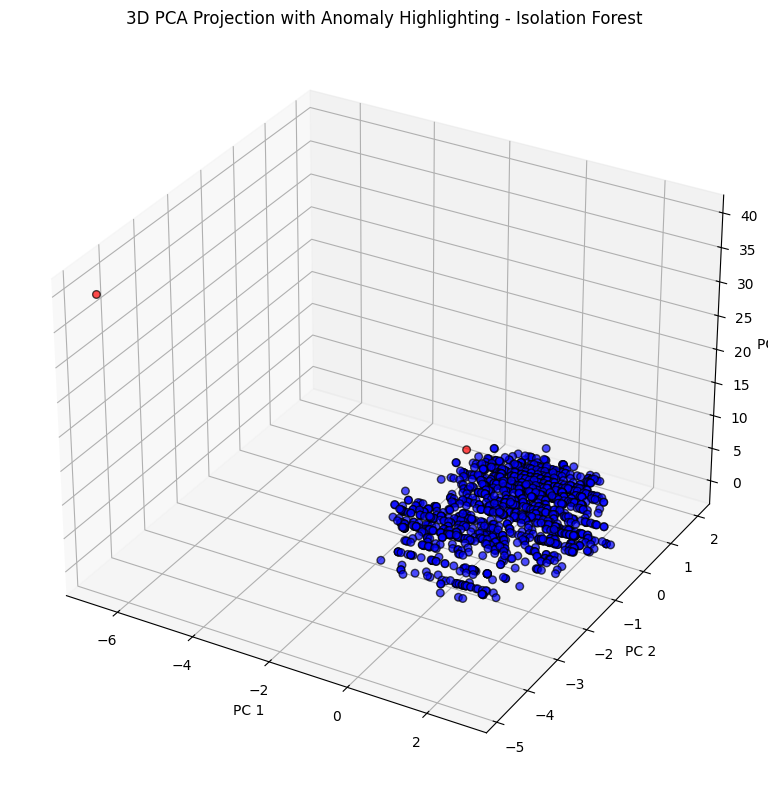

In [14]:
#isolation forest implementation
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination= 0.01, n_estimators= 100, n_jobs=-1)
flagged = clf.fit(feature_scaled_train)
predict_test = clf.predict(feature_scaled_test)

x = feature_pca[:, 0]
y = feature_pca[:, 1]
point_colors = ['blue' if lab==1 else 'red' for lab in predict_test]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # ← enables 3D projection

from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
feature_pca3 = pca3.fit_transform(feature_scaled_test)

# 2) Unpack into x, y, z
x3 = feature_pca3[:, 0]
y3 = feature_pca3[:, 1]
z3 = feature_pca3[:, 2]

# 3) Map isolation‑forest flags to colors
# flagged: array of 1 (inlier) or -1 (anomaly)
colors = ['blue' if lab == 1 else 'red' for lab in predict_test]

# 4) Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3, y3, z3,
           c=colors,
           s=30,
           edgecolor='k',
           alpha=0.7)

ax.set_title('3D PCA Projection with Anomaly Highlighting - Isolation Forest')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.tight_layout()
plt.show()


In [12]:
#isolation forest implementation
from sklearn.ensemble import IsolationForest


clf = IsolationForest(contamination= 0.10, n_estimators= 10000, n_jobs=-1)
flagged = clf.fit(feature_scaled_train)
predict_test = clf.predict(feature_scaled_test)

x = feature_pca[:, 0]
y = feature_pca[:, 1]
point_colors = ['blue' if lab==1 else 'red' for lab in predict_test]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # ← enables 3D projection

from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
feature_pca3 = pca3.fit_transform(feature_scaled_test)

# 2) Unpack into x, y, z
x3 = feature_pca3[:, 0]
y3 = feature_pca3[:, 1]
z3 = feature_pca3[:, 2]

# 3) Map isolation‑forest flags to colors
# flagged: array of 1 (inlier) or -1 (anomaly)
colors = ['blue' if lab == 1 else 'red' for lab in predict_test]

# 4) Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3, y3, z3,
           c=colors,
           s=30,
           edgecolor='k',
           alpha=0.7)

ax.set_title('3D PCA Projection with Anomaly Highlighting - Isolation Forest')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [15]:
#filtering out extreme outliers
anomaly_scores = clf.decision_function(feature_scaled_test)

extreme_outlier = np.argmin(anomaly_scores)
#print(extreme_outlier)
feature_scaled_test_clean = np.delete(feature_scaled_test, extreme_outlier, axis = 0)



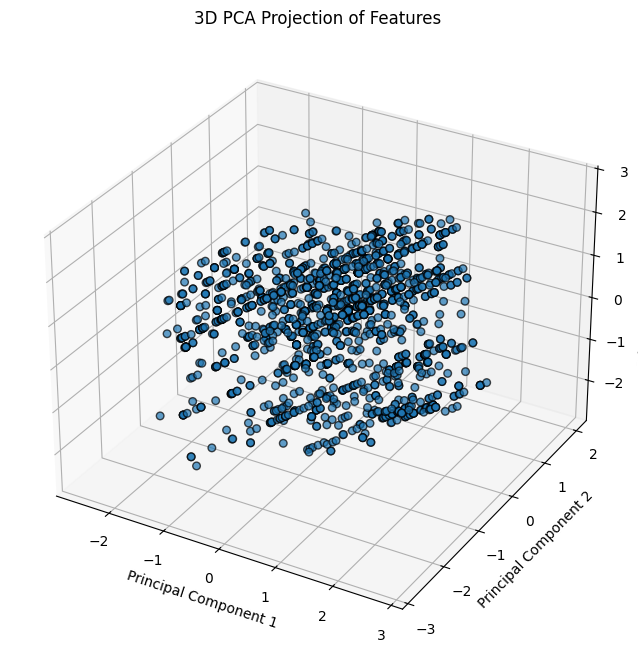

In [16]:


pca = PCA(n_components=3)
feature_pca = pca.fit_transform(feature_scaled_test_clean)


x = feature_pca[:, 0]
y = feature_pca[:, 1]
z = feature_pca[:, 2]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=30, edgecolor='k', alpha=0.7)

ax.set_title('3D PCA Projection of Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

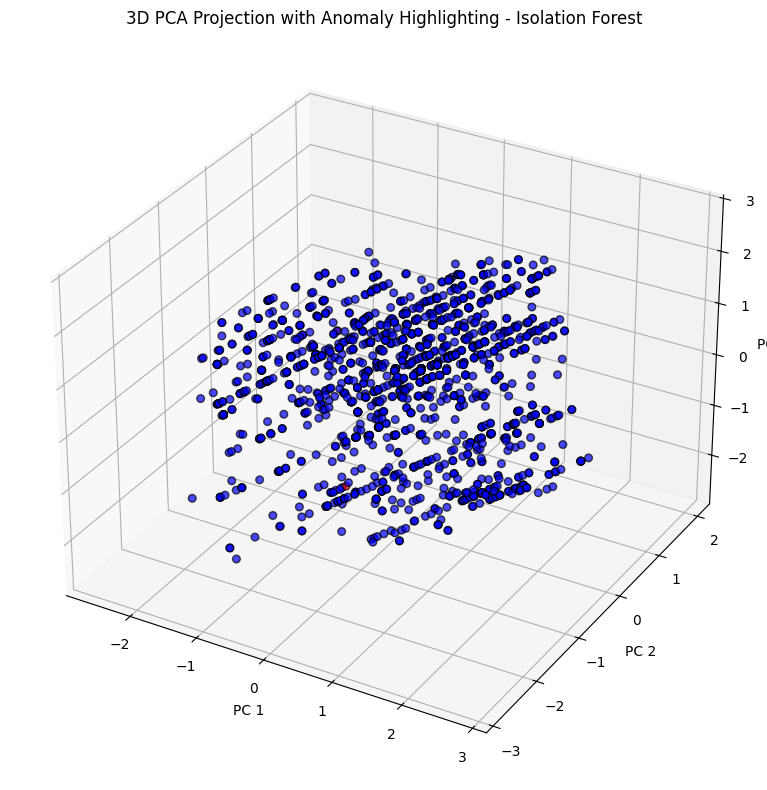

In [18]:
#isolation forest implementation
from sklearn.ensemble import IsolationForest


clf = IsolationForest(contamination= 0.01, n_estimators= 100, n_jobs=-1)
flagged = clf.fit(feature_scaled_train)
predict_test = clf.predict(feature_scaled_test_clean)

x = feature_pca[:, 0]
y = feature_pca[:, 1]
point_colors = ['blue' if lab==1 else 'red' for lab in predict_test]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # ← enables 3D projection

from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
feature_pca3 = pca3.fit_transform(feature_scaled_test_clean)

# 2) Unpack into x, y, z
x3 = feature_pca3[:, 0]
y3 = feature_pca3[:, 1]
z3 = feature_pca3[:, 2]

# 3) Map isolation‑forest flags to colors
# flagged: array of 1 (inlier) or -1 (anomaly)
colors = ['blue' if lab == 1 else 'red' for lab in predict_test]

# 4) Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3, y3, z3,
           c=colors,
           s=30,
           edgecolor='k',
           alpha=0.7)

ax.set_title('3D PCA Projection with Anomaly Highlighting - Isolation Forest')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.tight_layout()
plt.show()


In [19]:
import plotly.express as px


labels = ['Inlier' if lab == 1 else 'Anomaly' for lab in predict_test]
color_map = {'Inlier': 'blue', 'Anomaly': 'red'}

# Interactive 3D scatter plot
fig = px.scatter_3d(
    x=feature_pca3[:, 0],
    y=feature_pca3[:, 1],
    z=feature_pca3[:, 2],
    color=labels,
    color_discrete_map=color_map,
    title='3D PCA Projection with Anomaly Highlighting - Interactive Isolation Forest',
    labels={'x': 'PC 1', 'y': 'PC 2', 'z': 'PC 3'}
)
fig.update_traces(marker=dict(size=4, line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()

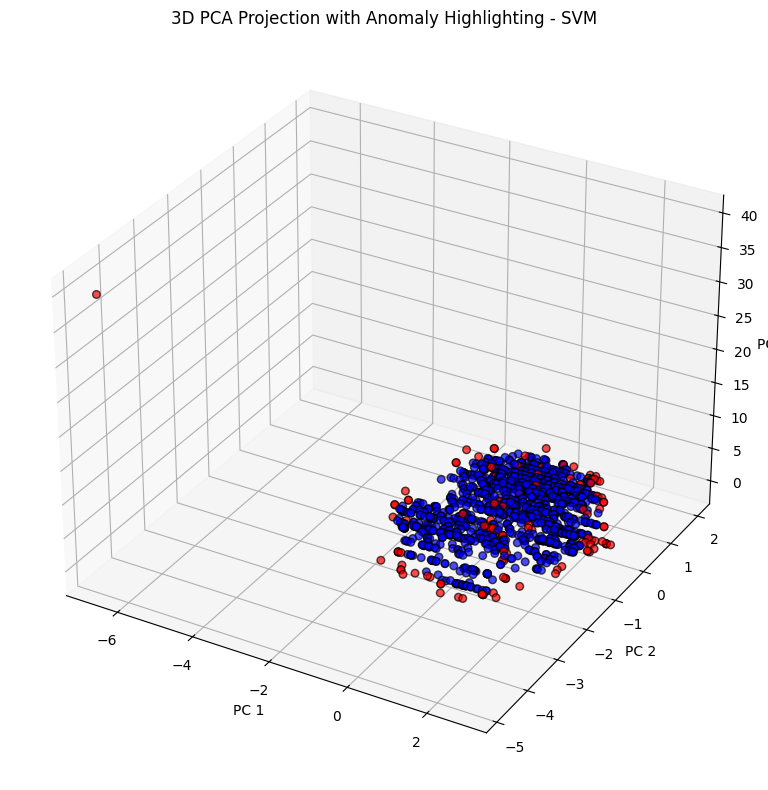

In [14]:
#one class SVM implementation
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.10)
flagged1 =svm.fit(feature_scaled_train)
predict_test1 = svm.predict(feature_scaled_test)

colors = ['blue' if lab == 1 else 'red' for lab in predict_test1]

from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
feature_pca3 = pca3.fit_transform(feature_scaled_test)

# 2) Unpack into x, y, z
x3 = feature_pca3[:, 0]
y3 = feature_pca3[:, 1]
z3 = feature_pca3[:, 2]



# 4) Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3, y3, z3,
           c=colors,
           s=30,
           edgecolor='k',
           alpha=0.7)

ax.set_title('3D PCA Projection with Anomaly Highlighting - SVM')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.tight_layout()
plt.show()

In [15]:
labels = ['Inlier' if lab == 1 else 'Anomaly' for lab in predict_test1]
color_map = {'Inlier': 'blue', 'Anomaly': 'red'}

# Interactive 3D scatter plot
fig = px.scatter_3d(
    x=feature_pca3[:, 0],
    y=feature_pca3[:, 1],
    z=feature_pca3[:, 2],
    color=labels,
    color_discrete_map=color_map,
    title='3D PCA Projection with Anomaly Highlighting - Interactive One Class SVM',
    labels={'x': 'PC 1', 'y': 'PC 2', 'z': 'PC 3'}
)
fig.update_traces(marker=dict(size=4, line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()

In [ ]:
#experimental autoencoder
"""
The plan is to utilize an autoencoder for anomaly detection,

We will encode and decode our features and the data that exceeds the reconstruction error
bounds will be flagged as anomalies 

"""

"""
Steps:
train normal looking data
give new data 


sub autoencoders

figure it out what data to encode


Create the autoencoder network
Train the autoencoder network
Compute and store the Reconstruction error scores
set a reconstruction error threshold
highlight that threshold on the PCA graph 
"""


In [ ]:
#autoencoder network
"""
The auto encoder needs implementation 
"""

In [ ]:

#DB Scan clustering